In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('./data/export (6).csv')
df.head()

,acctsessionid,acctuniqueid,username,groupname,realm,nasipaddress,nasidentifier,nasportid,nasporttype,acctstarttime,...,acctoutputoctets,calledstationid,callingstationid,acctterminatecause,servicetype,framedprotocol,framedipaddress,acctstartdelay,acctstopdelay,xascendsessionsvrkey
0,e05d547b3aa2_000_0000002693_1733544787,01d7bf04da530012afb8cf830929dfc4,zxve0132@b-warriors.life-seed.cityroam.jp,NaN,DEFAULT,172.23.10.101,jphub1.nghsig.jp,Dot11radio 2/0.,Wireless-802.11,2024/12/07 4:13,...,14748733,e0-5d-54-7b-3a-a2:cityroam,42-4b-fb-6d-28-94,User-Request,Framed-User,NaN,172.25.30.252,NaN,NaN,NaN
1,e05d547b39f3_000_0000003166_1733552003,3016aa0844464d3e2dcb27a010f0daa2,zxve0132@b-warriors.life-seed.cityroam.jp,NaN,DEFAULT,172.23.10.103,jphub1.nghsig.jp,Dot11radio 2/0.,Wireless-802.11,2024/12/07 6:13,...,2515702,e0-5d-54-7b-39-f3:cityroam,42-4b-fb-6d-28-94,User-Request,Framed-User,NaN,172.25.30.252,NaN,NaN,NaN
2,e05d547b39f3_000_0000007147_1733545649,f37c544f252c24d6795d51b17ca0d061,zxve0132@b-warriors.life-seed.cityroam.jp,NaN,DEFAULT,172.23.10.103,jphub1.nghsig.jp,Dot11radio 2/0.,Wireless-802.11,2024/12/07 4:27,...,704180,e0-5d-54-7b-39-f3:cityroam,42-4b-fb-6d-28-94,User-Request,Framed-User,NaN,172.25.30.252,NaN,NaN,NaN
3,e05d547b39f3_000_0000002988_1733551508,9b721fde20d1b0464ea5968b14a15531,zubp0328@b-warriors.life-seed.cityroam.jp,NaN,DEFAULT,172.23.10.103,jphub1.nghsig.jp,Dot11radio 2/0.,Wireless-802.11,2024/12/07 6:05,...,1095211,e0-5d-54-7b-39-f3:cityroam,ee-71-d9-60-df-3f,User-Request,Framed-User,NaN,172.25.31.171,NaN,NaN,NaN
4,e05d547b39f3_000_0000001083_1733546903,8b97a0ad42646c8e0eef257570f95357,zubp0328@b-warriors.life-seed.cityroam.jp,NaN,DEFAULT,172.23.10.103,jphub1.nghsig.jp,Dot11radio 2/0.,Wireless-802.11,2024/12/07 4:48,...,0,e0-5d-54-7b-39-f3:cityroam,ee-71-d9-60-df-3f,User-Request,Framed-User,NaN,0.0.0.0,NaN,NaN,NaN


#1. 時間別およびAP別ユニーク接続数

In [23]:

df['acctstarttime'] = pd.to_datetime(df['acctstarttime'], format='%Y/%m/%d %H:%M')
df['acctstoptime'] = pd.to_datetime(df['acctstoptime'], format='%Y/%m/%d %H:%M')

# Adjust to GMT+9 (Japan time)
df['acctstarttime'] = df['acctstarttime'] + pd.to_timedelta(9, unit='h')
df['acctstoptime'] = df['acctstoptime'] + pd.to_timedelta(9, unit='h')

# Extract date and time (including hour, minute, second)
df['start_time'] = df['acctstarttime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['stop_time'] = df['acctstoptime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Extract the hour and date of the start and stop times for grouping
df['start_date'] = df['acctstarttime'].dt.date
df['stop_date'] = df['acctstoptime'].dt.date
df['start_hour'] = df['acctstarttime'].dt.hour
df['start_minute'] = df['acctstarttime'].dt.minute
df['start_second'] = df['acctstarttime'].dt.second

# Group by start_date, start_time, and nasipaddress to calculate unique connections
unique_connections_by_hour_ap = df.groupby(['start_date', 'start_time', 'nasipaddress'])['acctsessionid'].nunique().reset_index()

# Rename columns for clarity
unique_connections_by_hour_ap.columns = ['date', 'hour', 'nasipaddress', 'unique_connections']

# Display the results
pd.set_option('display.max_rows', None) 
print("1. 時間別およびAP別のユニーク接続数:")
print(unique_connections_by_hour_ap)


1. 時間別およびAP別のユニーク接続数:
            date                 hour   nasipaddress  unique_connections
0     2024-12-06  2024-12-06 12:20:00  172.23.10.102                   1
1     2024-12-06  2024-12-06 12:22:00  172.23.10.102                   1
2     2024-12-06  2024-12-06 12:23:00  172.23.10.102                   1
3     2024-12-06  2024-12-06 12:24:00  172.23.10.102                   1
4     2024-12-06  2024-12-06 12:25:00  172.23.10.101                   1
5     2024-12-06  2024-12-06 12:26:00  172.23.10.101                   1
6     2024-12-06  2024-12-06 12:27:00  172.23.10.101                   2
7     2024-12-06  2024-12-06 12:28:00  172.23.10.102                   1
8     2024-12-06  2024-12-06 12:29:00  172.23.10.102                   1
9     2024-12-06  2024-12-06 12:30:00  172.23.10.101                   1
10    2024-12-06  2024-12-06 12:30:00  172.23.10.103                   1
11    2024-12-06  2024-12-06 12:31:00  172.23.10.101                   1
12    2024-12-06  2024-12-06 

#2.時間およびAP別の累積接続数

In [24]:
df['acctstarttime'] = pd.to_datetime(df['acctstarttime'], format='%m/%d/%Y %H:%M')
df['acctstoptime'] = pd.to_datetime(df['acctstoptime'], format='%m/%d/%Y %H:%M')

# Adjust to GMT+9 (Japan time)
df['acctstarttime'] = df['acctstarttime'] + pd.to_timedelta(9, unit='h')
df['acctstoptime'] = df['acctstoptime'] + pd.to_timedelta(9, unit='h')


df['start_hour'] = df['acctstarttime'].dt.hour
df['stop_hour'] = df['acctstoptime'].dt.hour

# Sort the DataFrame by 'acctstarttime'
df = df.sort_values(by='acctstarttime')

# Calculate the cumulative number of connections
df['cumulative_connections'] = df.groupby(['nasipaddress', 'start_hour']).cumcount() + 1

# Set pandas to display all rows
pd.set_option('display.max_rows', None)


print("\n2. 時間およびAP別の累積接続数:")
print(df[['acctstarttime', 'nasipaddress', 'cumulative_connections']])


pd.reset_option('display.max_rows')


2. 時間およびAP別の累積接続数:
           acctstarttime   nasipaddress  cumulative_connections
3532 2024-12-06 21:20:00  172.23.10.102                       1
3534 2024-12-06 21:22:00  172.23.10.102                       2
3536 2024-12-06 21:23:00  172.23.10.102                       3
3537 2024-12-06 21:24:00  172.23.10.102                       4
3538 2024-12-06 21:25:00  172.23.10.101                       1
3540 2024-12-06 21:26:00  172.23.10.101                       2
3541 2024-12-06 21:27:00  172.23.10.101                       3
3542 2024-12-06 21:27:00  172.23.10.101                       4
3544 2024-12-06 21:28:00  172.23.10.102                       5
3547 2024-12-06 21:29:00  172.23.10.102                       6
3150 2024-12-06 21:30:00  172.23.10.103                       1
3552 2024-12-06 21:30:00  172.23.10.101                       5
3554 2024-12-06 21:31:00  172.23.10.101                       6
3555 2024-12-06 21:32:00  172.23.10.101                       7
3556 2024-12-06 21:3

#3.APによる最大同時接続数

In [25]:


# Convert start and stop time to datetime objects
df['acctstarttime'] = pd.to_datetime(df['acctstarttime'], format='%m/%d/%Y %H:%M')
df['acctstoptime'] = pd.to_datetime(df['acctstoptime'], format='%m/%d/%Y %H:%M')

# Adjust to GMT+9 (Japan time)
df['acctstarttime'] = df['acctstarttime'] + pd.to_timedelta(9, unit='h')
df['acctstoptime'] = df['acctstoptime'] + pd.to_timedelta(9, unit='h')


df['start_hour'] = df['acctstarttime'].dt.hour
df['stop_hour'] = df['acctstoptime'].dt.hour


events = []

for index, row in df.iterrows():
    events.append((row['acctstarttime'], 1, row['nasipaddress'])) 
    events.append((row['acctstoptime'], -1, row['nasipaddress']))  


events.sort(key=lambda x: (x[0], x[1]))


max_concurrent_connections = {}


current_connections = {}

# Track maximum concurrent connections for each AP
for timestamp, change, nasipaddress in events:
    # Update the current connections count for this AP
    current_connections[nasipaddress] = current_connections.get(nasipaddress, 0) + change
    
    # Track the maximum concurrent connections for this AP
    if nasipaddress not in max_concurrent_connections:
        max_concurrent_connections[nasipaddress] = current_connections[nasipaddress]
    else:
        max_concurrent_connections[nasipaddress] = max(max_concurrent_connections[nasipaddress], current_connections[nasipaddress])


max_concurrent_df = pd.DataFrame(list(max_concurrent_connections.items()), columns=['nasipaddress', 'max_concurrent_connections'])

print("\n3. APによる最大同時接続数:")
print(max_concurrent_df)


3. APによる最大同時接続数:
    nasipaddress  max_concurrent_connections
0  172.23.10.102                          19
1  172.23.10.101                          71
2  172.23.10.103                         161


##################ヒートマップ########################################

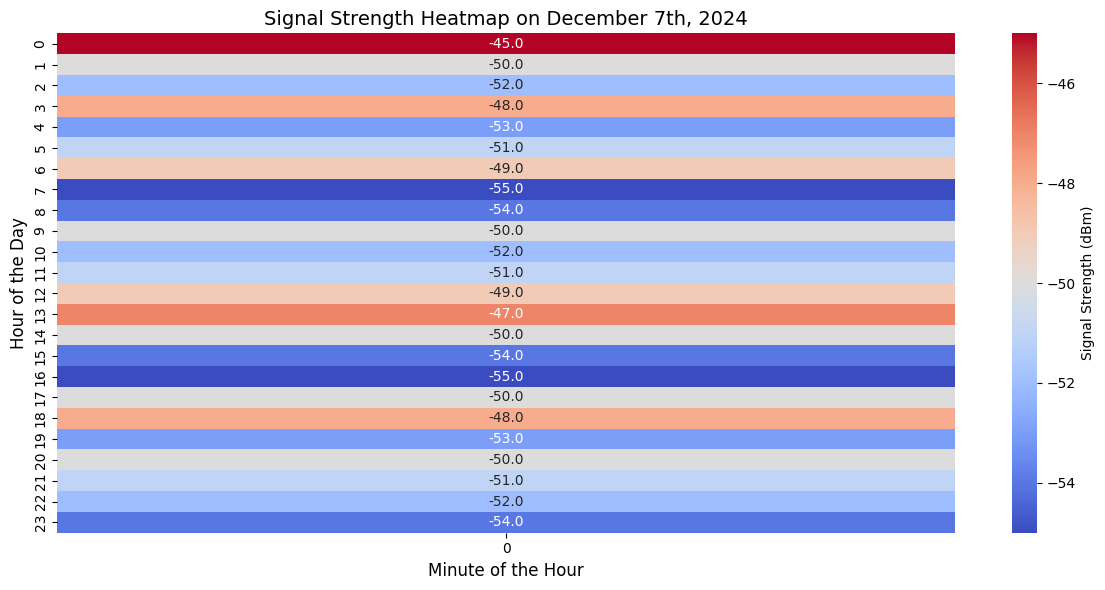

In [26]:


# Data for December 7th, 2024 


data = {
    'timestamp': ['2024-12-07 00:00:00', '2024-12-07 01:00:00', '2024-12-07 02:00:00', 
                  '2024-12-07 03:00:00', '2024-12-07 04:00:00', '2024-12-07 05:00:00',
                  '2024-12-07 06:00:00', '2024-12-07 07:00:00', '2024-12-07 08:00:00', 
                  '2024-12-07 09:00:00', '2024-12-07 10:00:00', '2024-12-07 11:00:00',
                  '2024-12-07 12:00:00', '2024-12-07 13:00:00', '2024-12-07 14:00:00', 
                  '2024-12-07 15:00:00', '2024-12-07 16:00:00', '2024-12-07 17:00:00', 
                  '2024-12-07 18:00:00', '2024-12-07 19:00:00', '2024-12-07 20:00:00', 
                  '2024-12-07 21:00:00', '2024-12-07 22:00:00', '2024-12-07 23:00:00'],
    'signal_strength': [-45, -50, -52, -48, -53, -51, -49, -55, -54, -50, -52, -51, -49, -47, 
                        -50, -54, -55, -50, -48, -53, -50, -51, -52, -54],
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter data for December 7th, 2024
df = df[df['timestamp'].dt.date == pd.to_datetime('2024-12-07').date()]


#Extract Hour and Minute Information

df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute


#Pivot Data for Heatmap


pivot_data = df.pivot(index='hour', columns='minute', values='signal_strength')


# Create Heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="coolwarm", cbar_kws={'label': 'Signal Strength (dBm)'}, annot=True, fmt='.1f')

# Title and labels
plt.title('Signal Strength Heatmap on December 7th, 2024', fontsize=14)
plt.xlabel('Minute of the Hour', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


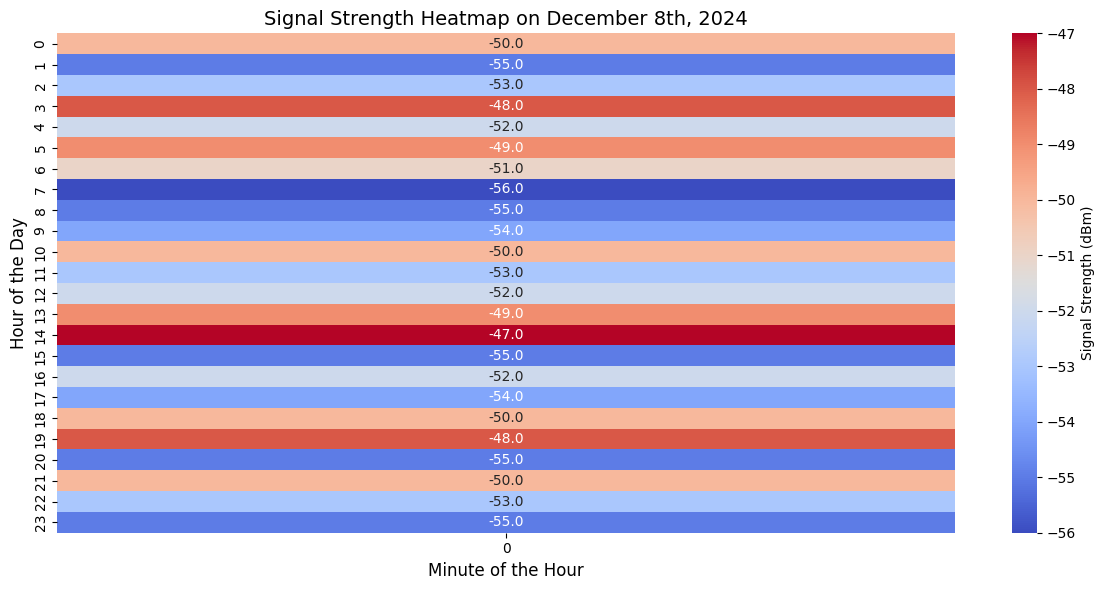

In [27]:


# Data for December 8th, 2024
data = {
    'timestamp': ['2024-12-08 00:00:00', '2024-12-08 01:00:00', '2024-12-08 02:00:00', 
                  '2024-12-08 03:00:00', '2024-12-08 04:00:00', '2024-12-08 05:00:00',
                  '2024-12-08 06:00:00', '2024-12-08 07:00:00', '2024-12-08 08:00:00', 
                  '2024-12-08 09:00:00', '2024-12-08 10:00:00', '2024-12-08 11:00:00',
                  '2024-12-08 12:00:00', '2024-12-08 13:00:00', '2024-12-08 14:00:00', 
                  '2024-12-08 15:00:00', '2024-12-08 16:00:00', '2024-12-08 17:00:00', 
                  '2024-12-08 18:00:00', '2024-12-08 19:00:00', '2024-12-08 20:00:00', 
                  '2024-12-08 21:00:00', '2024-12-08 22:00:00', '2024-12-08 23:00:00'],
    'signal_strength': [-50, -55, -53, -48, -52, -49, -51, -56, -55, -54, -50, -53, -52, -49, 
                        -47, -55, -52, -54, -50, -48, -55, -50, -53, -55],
}


df = pd.DataFrame(data)


df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter data for December 8th, 2024
df = df[df['timestamp'].dt.date == pd.to_datetime('2024-12-08').date()]


# Extract Hour and Minute Information

df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute


# Pivot Data for Heatmap


pivot_data = df.pivot(index='hour', columns='minute', values='signal_strength')


#  Create Heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="coolwarm", cbar_kws={'label': 'Signal Strength (dBm)'}, annot=True, fmt='.1f')

# Title and labels
plt.title('Signal Strength Heatmap on December 8th, 2024', fontsize=14)
plt.xlabel('Minute of the Hour', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [44]:



data = pd.read_csv('./data/export (6).csv')


df = pd.DataFrame(data)

# Convert acctstarttime and acctstoptime to datetime objects
df['acctstarttime'] = pd.to_datetime(df['acctstarttime'], errors='coerce')
df['acctstoptime'] = pd.to_datetime(df['acctstoptime'], errors='coerce')

# Filter data for the date range: 12/7/2024 and 12/8/2024
df_filtered = df[(df['acctstarttime'].dt.date == pd.to_datetime('2024-12-07').date()) |
                 (df['acctstarttime'].dt.date == pd.to_datetime('2024-12-08').date())]

# Calculate unique connections by counting unique usernames
unique_connections = df_filtered['username'].nunique()



# Output the result in the desired format




print(f"Users Connections on 12/7 and 12/8: {unique_connections}")




Users Connections on 12/7 and 12/8: 620
